In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy
import seaborn
import zarr
from skimage import img_as_float32

In [55]:
zarr_path = '/data/gent/vo/000/gvo00070/vsc42015/datasets/weizmann/EhV/v2/images/Ctrl_T7_R3_24.zarr'
zarr_idx = 4230
z = zarr.open(zarr_path)

In [56]:
pixels = z[zarr_idx].reshape(z.attrs["shape"][zarr_idx])

In [57]:
pixels = numpy.clip(pixels, a_min=0, a_max=4096).astype(float)
pixels = img_as_float32(pixels)

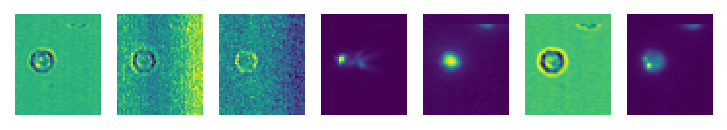

In [58]:
fig, axes = plt.subplots(1, len(pixels), dpi=150, squeeze=False)
axes = axes.ravel()
for p, ax in zip(pixels, axes):
    ax.imshow(p)
    ax.set_axis_off()

In [59]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.morphology import white_tophat, disk

In [60]:
pixels2 = pixels.copy()

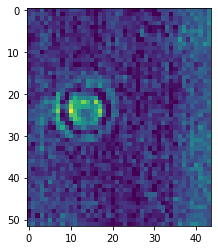

In [61]:
plt.imshow(white_tophat(pixels[1], disk(10)))

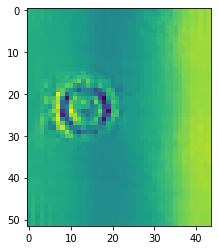

In [82]:
sigma = estimate_sigma(pixels[1])
pixels2[1] = denoise_nl_means(pixels[1], patch_size=10, patch_distance=5, sigma=sigma, h=sigma)
plt.imshow(pixels2[1])

In [83]:
from scip.segmentation import util, threshold

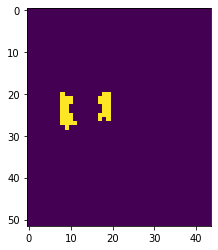

In [84]:
m = threshold.get_mask(dict(pixels=pixels), main=True, main_channel=0)
m = util.get_bounding_box(m, bbox_channel=0)
m = threshold.get_mask(m, main=False, main_channel=0)
plt.imshow(m["mask"][1])

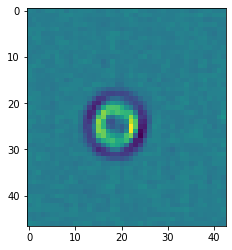

In [52]:
plt.imshow(m["pixels"][0])

# White tophat

In [51]:
from skimage.morphology import white_tophat, disk

In [52]:
bbox = m["bbox"]
bboxed = pixels[:, bbox[0]: bbox[2], bbox[1]:bbox[3]]

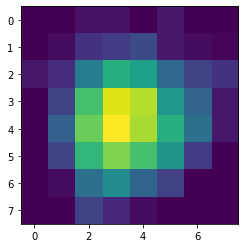

In [54]:
plt.imshow(white_tophat(bboxed[1], selem=disk(3)))

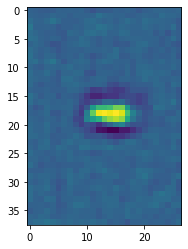

In [24]:
plt.imshow(pixels[0])